In [1]:
DATASET = 'GTSRB'
SEED = 42

In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fastprogress import progress_bar
from pathlib import Path

import torch
import torchvision.transforms as T
from sklearn.model_selection import train_test_split

In [4]:
# set homw directory
import os
from pathlib import Path

base = Path().cwd()

if base.name != 'runtime-monitoring':
    os.chdir('../')
    base = Path().cwd()

base

PosixPath('/home/ah19/runtime-monitoring')

In [5]:
from utilities.utils import *
from utilities.pathManager import fetchPaths
from utilities.plotFunctions import *

# GPU Device & Seed

In [6]:
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

# Paths

In [7]:
paths = fetchPaths(base, DATASET, '', False)
path_dataset = paths['data']

path_dataset

PosixPath('/home/ah19/runtime-monitoring/datasets/GTSRB')

# Load / Split / DataLoader

In [8]:
feature_names = get_labels(DATASET)

test_data = get_dataset(DATASET, path_dataset, train=False)

len(test_data)

4224

In [21]:
_, idx = train_test_split(test_data.data.index, stratify=test_data.data[0], test_size=43*5)

In [22]:
t = T.GaussianBlur(5, sigma=(0.1, 2.0))

In [23]:
id = 0

im = torch.tensor(plt.imread(test_data.root / test_data.data[1][idx[id]])).permute(2, 0, 1)

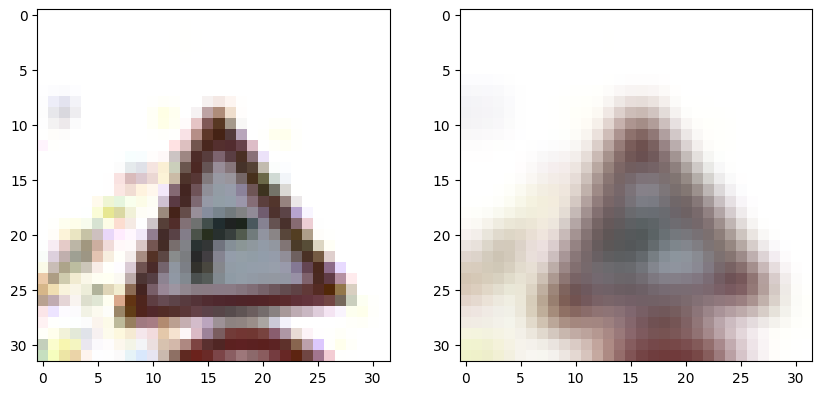

In [24]:
t = T.GaussianBlur(5, sigma=(2, 2))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(im.permute(1, 2, 0))
ax[1].imshow(t(im).permute(1, 2, 0))

plt.show()

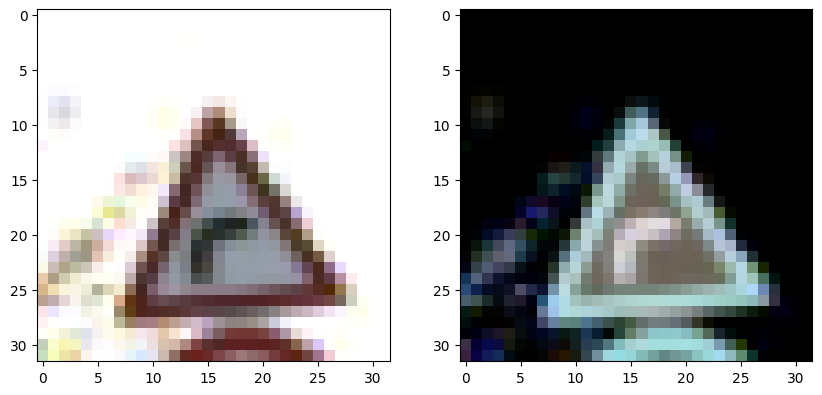

In [25]:
t = T.RandomSolarize(1, p=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(im.permute(1, 2, 0))
ax[1].imshow(t(im).permute(1, 2, 0))

plt.show()

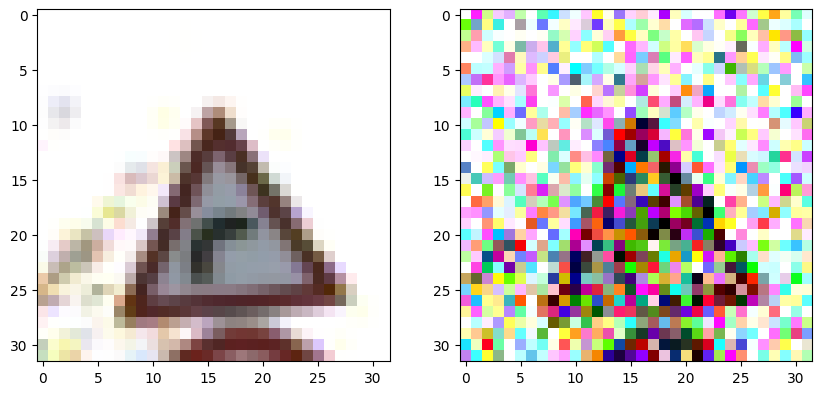

In [54]:
class AddGaussianNoise():
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        tensor = tensor + torch.randn(tensor.size()) * self.std + self.mean
        return torch.clamp(tensor / 255, 0, 1)
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)


t = AddGaussianNoise(0, 100)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(im.permute(1, 2, 0))
ax[1].imshow(t(im).permute(1, 2, 0))

plt.show()

1


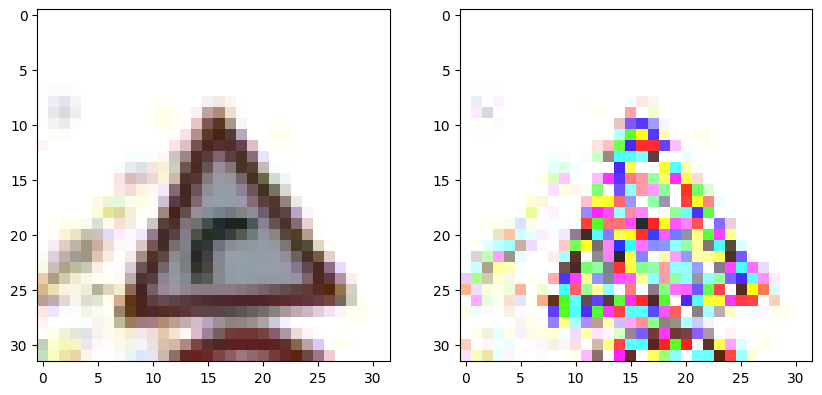

In [73]:
class AddSaltandPepper():
    def __init__(self, num=1):
        self.num=num
        
    def __call__(self, tensor):
        tensor = tensor / 255
        
        print(self.num)
        
        for i in range(max(1, self.num)):
            tensor += torch.randint(0, 2, tensor.size())
            
        return torch.clamp(tensor, 0, 1)


t = AddSaltandPepper(1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(im.permute(1, 2, 0))
ax[1].imshow(t(im).permute(1, 2, 0))

plt.show()